In [1]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

In [2]:
def skinDetectionHSV(img):
    # Convert img to HSV
    imgHSV = cv.cvtColor(img, cv.COLOR_BGR2HSV)

    # Boundaries for the HSV colorspace
    lowerBoundHSV = np.array([0, 58, 30])
    upperBoundHSV = np.array([33, 180, 135])

    # Create mask
    mask = cv.inRange(imgHSV, lowerBoundHSV, upperBoundHSV)

    # Apply mask to original image
    imgMasked = cv.bitwise_and(img, img, mask=mask)

    # Show image
    cv.imshow('Original', img)
    cv.imshow('Mask', mask)
    cv.imshow('Masked Image', imgMasked)

    return imgMasked

def skinDetectionYCC(img):
    # Convert img to YCrCb
    imgYCC = cv.cvtColor(img, cv.COLOR_BGR2YCrCb)

    # Boundaries for the YCrCb colorspace
    lowerBoundYCC = np.array([0, 133, 77])
    upperBoundYCC = np.array([235, 173, 127])

    # Create mask
    mask = cv.inRange(imgYCC, lowerBoundYCC, upperBoundYCC)

    # Apply mask to original image
    imgMasked = cv.bitwise_and(img, img, mask=mask)

    # Show image
    cv.imshow('Original', img)
    cv.imshow('Mask', mask)
    cv.imshow('Masked Image', imgMasked)

    return imgMasked

def calcPrecision(img, gt):
    # Convert to grayscale
    imgGray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
    gtGray = cv.cvtColor(gt, cv.COLOR_BGR2GRAY)

    # Thresholding
    ret, imgThresh = cv.threshold(imgGray, 0, 255, cv.THRESH_BINARY)
    ret, gtThresh = cv.threshold(gtGray, 0, 255, cv.THRESH_BINARY)

    # Calculate precision
    precision = cv.countNonZero(imgThresh & gtThresh) / cv.countNonZero(imgThresh)
    print('Precision: ', precision)

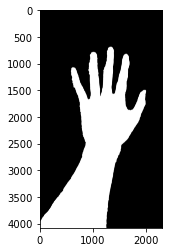

In [3]:
# Read image
img = cv.imread(".\hand1.jpg")
groundTruth = cv.imread(".\hand1_GT.jpg")

plt.imshow(img)
plt.imshow(groundTruth)

In [28]:

# Apply skin detection
imgSkinHSV = skinDetectionHSV(img)
calcPrecision(imgSkinHSV, groundTruth)

imgSkinYCC = skinDetectionYCC(img)
calcPrecision(imgSkinYCC, groundTruth)

Precision:  0.3233021640619912
Precision:  0.30622220020634194


: 